In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor


In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [3]:
class data_manage:
      def __init__(self, dataframe):
            self.dataframe = dataframe
        
      def null_check(self, percent = 0):
            for feature in self.dataframe.columns:
                if self.dataframe[feature].isnull().sum()/self.dataframe.shape[0] >= percent:
                    print(feature)
                    print(self.dataframe[feature].isnull().sum()/self.dataframe.shape[0])
                
      def creat_null_list(self, percent = 0):
            lst = []
            for feature in self.dataframe.columns:
                if self.dataframe[feature].isnull().sum()/self.dataframe.shape[0] >= percent:
                    lst.append(feature)
                    
      def fillna_mode(self, lst):
            for feature in lst:
                self.dataframe[feature].fillna(self.dataframe[feature].mode()[0], inplace = True)
            return self.dataframe
                
      def collect_ob_col(self):
            ob_col = []
            for feature in self.dataframe.columns:
                if self.dataframe[feature].dtypes == 'object':
                    ob_col.append(feature)
            return ob_col
                    
      def collect_int_col(self):
            int_col = []
            for feature in self.dataframe.columns:
                if self.dataframe[feature].dtypes == 'int64':
                    int_col.append(feature)
            return int_col
                    
      def collect_float_col(self):
            float_col = []
            for feature in self.dataframe.columns:
                if self.dataframe[feature].dtypes == 'float64':
                    float_col.append(feature)
            return float_col

In [4]:
train_df = data_manage(train_data)

In [5]:
train_df.dataframe

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,NaN,10.0,20.0,1.0,NaN,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [6]:
train_df.null_check()

id
0.0
timestamp
0.0
full_sq
0.0
life_sq
0.20947786419874634
floor
0.005480620918250139
max_floor
0.31413475107479244
material
0.31413475107479244
build_year
0.44649010534606676
num_room
0.31413475107479244
kitch_sq
0.31413475107479244
state
0.44498047323684814
product_type
0.0
sub_area
0.0
area_m
0.0
raion_popul
0.0
green_zone_part
0.0
indust_part
0.0
children_preschool
0.0
preschool_quota
0.2194873814446523
preschool_education_centers_raion
0.0
children_school
0.0
school_quota
0.21938892717665978
school_education_centers_raion
0.0
school_education_centers_top_20_raion
0.0
hospital_beds_raion
0.4739260280266483
healthcare_centers_raion
0.0
university_top_20_raion
0.0
sport_objects_raion
0.0
additional_education_raion
0.0
culture_objects_top_25
0.0
culture_objects_top_25_raion
0.0
shopping_centers_raion
0.0
office_raion
0.0
thermal_power_plant_raion
0.0
incineration_raion
0.0
oil_chemistry_raion
0.0
radiation_raion
0.0
railroad_terminal_raion
0.0
big_market_raion
0.0
nuclear_reactor_ra

In [7]:
train_df.null_check(0.2)

life_sq
0.20947786419874634
max_floor
0.31413475107479244
material
0.31413475107479244
build_year
0.44649010534606676
num_room
0.31413475107479244
kitch_sq
0.31413475107479244
state
0.44498047323684814
preschool_quota
0.2194873814446523
school_quota
0.21938892717665978
hospital_beds_raion
0.4739260280266483
cafe_sum_500_min_price_avg
0.43585704440287487
cafe_sum_500_max_price_avg
0.43585704440287487
cafe_avg_price_500
0.43585704440287487
cafe_sum_1000_min_price_avg
0.21410521479439468
cafe_sum_1000_max_price_avg
0.21410521479439468
cafe_avg_price_1000
0.21410521479439468


In [8]:
train_df.fillna_mode(train_df.dataframe.columns)

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,17.0,1.0,2014.0,2.0,1.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,17.0,1.0,2014.0,2.0,1.0,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,17.0,1.0,2014.0,2.0,1.0,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,17.0,1.0,2014.0,2.0,1.0,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,17.0,1.0,2014.0,2.0,1.0,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,19.0,10.0,20.0,1.0,2014.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [9]:
float_col = train_df.collect_float_col()

In [10]:
float_col

['life_sq',
 'floor',
 'max_floor',
 'material',
 'build_year',
 'num_room',
 'kitch_sq',
 'state',
 'area_m',
 'green_zone_part',
 'indust_part',
 'preschool_quota',
 'school_quota',
 'hospital_beds_raion',
 'raion_build_count_with_material_info',
 'build_count_block',
 'build_count_wood',
 'build_count_frame',
 'build_count_brick',
 'build_count_monolith',
 'build_count_panel',
 'build_count_foam',
 'build_count_slag',
 'build_count_mix',
 'raion_build_count_with_builddate_info',
 'build_count_before_1920',
 'build_count_1921-1945',
 'build_count_1946-1970',
 'build_count_1971-1995',
 'build_count_after_1995',
 'metro_min_avto',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'kindergarten_km',
 'school_km',
 'park_km',
 'green_zone_km',
 'industrial_km',
 'water_treatment_km',
 'cemetery_km',
 'incineration_km',
 'railroad_station_walk_km',
 'railroad_station_walk_min',
 'ID_railroad_station_walk',
 'railroad_station_avto_km',
 'railroad_station_avto_min',
 'public_transport

In [11]:
ob_col = train_df.collect_ob_col()

In [12]:
ob_col

['timestamp',
 'product_type',
 'sub_area',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology']

In [13]:
int_col = train_df.collect_int_col()

In [14]:
int_col

['id',
 'full_sq',
 'raion_popul',
 'children_preschool',
 'preschool_education_centers_raion',
 'children_school',
 'school_education_centers_raion',
 'school_education_centers_top_20_raion',
 'healthcare_centers_raion',
 'university_top_20_raion',
 'sport_objects_raion',
 'additional_education_raion',
 'culture_objects_top_25_raion',
 'shopping_centers_raion',
 'office_raion',
 'full_all',
 'male_f',
 'female_f',
 'young_all',
 'young_male',
 'young_female',
 'work_all',
 'work_male',
 'work_female',
 'ekder_all',
 'ekder_male',
 'ekder_female',
 '0_6_all',
 '0_6_male',
 '0_6_female',
 '7_14_all',
 '7_14_male',
 '7_14_female',
 '0_17_all',
 '0_17_male',
 '0_17_female',
 '16_29_all',
 '16_29_male',
 '16_29_female',
 '0_13_all',
 '0_13_male',
 '0_13_female',
 'ID_metro',
 'ID_railroad_station_avto',
 'ID_big_road1',
 'ID_big_road2',
 'ID_railroad_terminal',
 'ID_bus_terminal',
 'office_count_500',
 'office_sqm_500',
 'trc_count_500',
 'trc_sqm_500',
 'cafe_count_500',
 'cafe_count_500_

In [15]:
train_df.dataframe.corr()

,id,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,state,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
id,1.000000,0.021447,0.009282,-0.017050,-0.273488,0.244193,-0.003778,-0.039330,0.079477,-0.009777,...,0.018635,0.022958,0.023704,0.012813,0.015181,-0.048797,0.020671,-0.011680,-0.025627,0.121203
full_sq,0.021447,1.000000,0.144419,0.087855,0.051456,0.017168,-0.002629,0.333761,0.010323,-0.039139,...,0.039083,0.040059,0.043560,0.026895,0.028579,0.021568,0.030218,0.001580,-0.041254,0.341840
life_sq,0.009282,0.144419,1.000000,0.016425,0.025851,0.023454,-0.001929,0.174428,0.010822,-0.024543,...,0.028600,0.028564,0.030307,0.022045,0.022925,0.019810,0.023841,0.023397,0.000982,0.162654
floor,-0.017050,0.087855,0.016425,1.000000,0.362617,-0.017914,0.000396,-0.002488,-0.010762,-0.088091,...,-0.034465,-0.029429,-0.022283,-0.043798,-0.045083,-0.012817,-0.043784,-0.100560,-0.122325,0.118201
max_floor,-0.273488,0.051456,0.025851,0.362617,1.000000,-0.062143,-0.001529,0.007160,-0.017819,-0.077343,...,-0.037734,-0.032832,-0.029404,-0.043767,-0.043692,-0.027358,-0.045411,-0.083355,-0.092356,0.038467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mosque_count_5000,-0.048797,0.021568,0.019810,-0.012817,-0.027358,0.024321,0.014789,0.054956,0.005341,0.066670,...,0.529434,0.492859,0.481481,0.502028,0.550342,1.000000,0.499376,0.518500,0.242078,0.175107
leisure_count_5000,0.020671,0.030218,0.023841,-0.043784,-0.045411,0.041775,-0.000446,0.048117,-0.003097,0.000261,...,0.986206,0.975462,0.948391,0.969029,0.975259,0.499376,1.000000,0.809169,0.463053,0.200448
sport_count_5000,-0.011680,0.001580,0.023397,-0.100560,-0.083355,0.082950,0.004956,0.074481,0.015531,0.151604,...,0.824139,0.778770,0.753384,0.825883,0.847771,0.518500,0.809169,1.000000,0.733897,0.294864
market_count_5000,-0.025627,-0.041254,0.000982,-0.122325,-0.092356,0.063879,0.006184,0.051024,0.022997,0.214252,...,0.432265,0.380154,0.353270,0.482547,0.514344,0.242078,0.463053,0.733897,1.000000,0.194021


In [16]:
train_df.dataframe.corr().iloc[0][0]

1.0

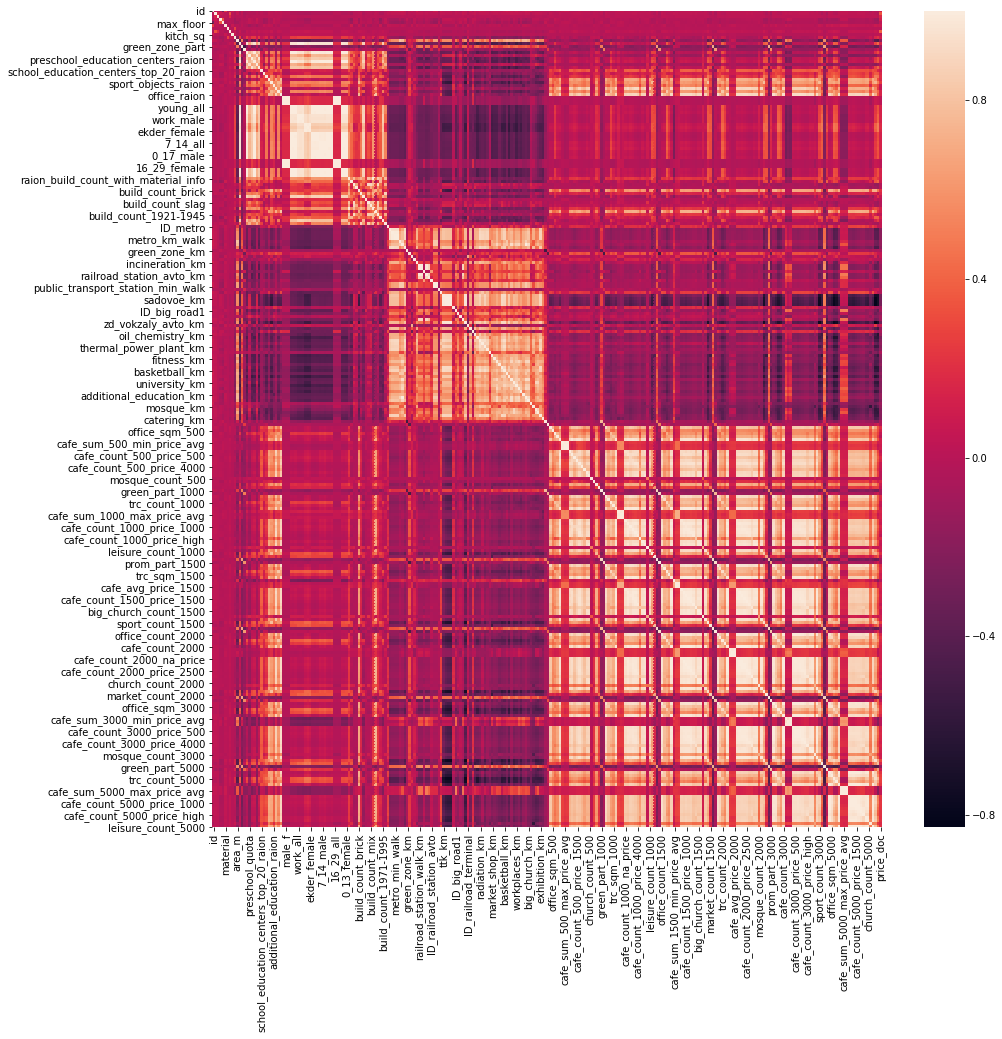

In [17]:
plt.figure(figsize = (15,15))
sns.heatmap(train_df.dataframe.corr())

In [18]:
def find_corr(dataframe, percent = 0):
    result = []
    lst = [feature for feature in dataframe.columns if dataframe[feature].dtypes == 'float64']
    for i in range(len(lst)):
        for j in range(i+1, len(lst)):
            if abs(dataframe[[lst[i], lst[j]]].corr().iloc[0][1]) > percent:
                result.append([lst[i], lst[j]])
    return result
            

In [24]:
df = train_df.dataframe

In [25]:
lst_corr = find_corr(df, 0.8)

In [26]:
df_col = pd.DataFrame(lst_corr)

In [27]:
df_col

,0,1
0,area_m,kindergarten_km
1,preschool_quota,school_quota
2,preschool_quota,build_count_panel
3,raion_build_count_with_material_info,build_count_slag
4,raion_build_count_with_material_info,raion_build_count_with_builddate_info
...,...,...
216,cafe_sum_3000_min_price_avg,cafe_avg_price_3000
217,cafe_sum_3000_max_price_avg,cafe_avg_price_3000
218,cafe_sum_5000_min_price_avg,cafe_sum_5000_max_price_avg
219,cafe_sum_5000_min_price_avg,cafe_avg_price_5000


In [28]:
lst1 = []
for i in range(len(lst_corr)):
    if lst_corr[i][1] not in lst1:
        lst1.append(lst_corr[i][1])

In [29]:
lst1

['kindergarten_km',
 'school_quota',
 'build_count_panel',
 'build_count_slag',
 'raion_build_count_with_builddate_info',
 'build_count_1921-1945',
 'build_count_mix',
 'build_count_after_1995',
 'metro_km_avto',
 'metro_min_walk',
 'metro_km_walk',
 'park_km',
 'radiation_km',
 'power_transmission_line_km',
 'thermal_power_plant_km',
 'ts_km',
 'basketball_km',
 'exhibition_km',
 'ttk_km',
 'stadium_km',
 'big_church_km',
 'school_km',
 'public_transport_station_km',
 'public_transport_station_min_walk',
 'hospice_morgue_km',
 'preschool_km',
 'swim_pool_km',
 'public_healthcare_km',
 'workplaces_km',
 'shopping_centers_km',
 'sadovoe_km',
 'railroad_station_walk_min',
 'railroad_station_avto_km',
 'railroad_station_avto_min',
 'railroad_km',
 'bulvar_ring_km',
 'kremlin_km',
 'zd_vokzaly_avto_km',
 'oil_chemistry_km',
 'nuclear_reactor_km',
 'detention_facility_km',
 'university_km',
 'theater_km',
 'museum_km',
 'office_km',
 'cafe_sum_500_max_price_avg',
 'cafe_avg_price_500',
 'gr

In [30]:
train_df.dataframe.drop(lst1, axis = 1, inplace = True)

In [31]:
train_df.dataframe

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,17.0,1.0,2014.0,2.0,1.0,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,17.0,1.0,2014.0,2.0,1.0,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,17.0,1.0,2014.0,2.0,1.0,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,17.0,1.0,2014.0,2.0,1.0,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,17.0,1.0,2014.0,2.0,1.0,...,319,108,17,135,236,2,91,195,14,16331452
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30466,30469,2015-06-30,44,27.0,7.0,9.0,1.0,1975.0,2.0,6.0,...,15,5,0,15,26,1,2,84,6,7400000
30467,30470,2015-06-30,86,59.0,3.0,9.0,2.0,1935.0,4.0,10.0,...,313,128,24,98,182,1,82,171,15,25000000
30468,30471,2015-06-30,45,19.0,10.0,20.0,1.0,2014.0,1.0,1.0,...,1,1,0,2,12,0,1,11,1,6970959
30469,30472,2015-06-30,64,32.0,5.0,15.0,1.0,2003.0,2.0,11.0,...,22,1,1,6,31,1,4,65,7,13500000


In [41]:
train_df_new = data_manage(train_df.dataframe)

In [42]:
ob_col_new = train_df_new.collect_ob_col()

In [43]:
ob_col_new

['timestamp',
 'product_type',
 'sub_area',
 'culture_objects_top_25',
 'thermal_power_plant_raion',
 'incineration_raion',
 'oil_chemistry_raion',
 'radiation_raion',
 'railroad_terminal_raion',
 'big_market_raion',
 'nuclear_reactor_raion',
 'detention_facility_raion',
 'water_1line',
 'big_road1_1line',
 'railroad_1line',
 'ecology']

In [45]:
le = LabelEncoder()

In [46]:
for feature in ob_col_new:
    train_df_new.dataframe[feature] = le.fit_transform(train_df_new.dataframe[feature].astype(str))

In [47]:
X_col = train_df.dataframe.columns[:227]
Y = train_df.dataframe.price_doc

In [48]:
X1, X2, Y1, Y2 = model_selection.train_test_split(train_df.dataframe[X_col], Y, train_size=0.75)

In [49]:
lm_lr = linear_model.LinearRegression()

In [50]:
lm_lr.fit(X1,Y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
lm_lr.predict(X2)

array([ 7254175.06126432, 17969308.25189642,  8241901.74699626, ...,
        5168184.60598781,  9337941.63515702,  9754932.65976065])

In [52]:
Y2

8641      7150000
23907    19200000
26146     5849867
7750      8414038
9725      6500000
           ...   
15376     5997000
14695     3000000
16251     6750000
27318     3000000
13385     9870000
Name: price_doc, Length: 7618, dtype: int64

In [55]:
print(metrics.mean_absolute_error(Y2, lm_lr.predict(X2)))
print(metrics.mean_squared_error(Y2, lm_lr.predict(X2)))
print(np.sqrt(metrics.mean_squared_error(Y2, lm_lr.predict(X2))))

2043557.5425516355
14652250137687.084
3827825.7715950296


In [57]:
rf_r = RandomForestRegressor()

In [58]:
rf_r.fit(X1, Y1)

C:\Users\haole\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [59]:
rf_r.predict(X2)

array([ 4828013.9, 24325016.8,  6544222.6, ...,  5799000. ,  8297023.7,
        8385000. ])

In [60]:
print(metrics.mean_absolute_error(Y2, rf_r.predict(X2)))
print(metrics.mean_squared_error(Y2, rf_r.predict(X2)))
print(np.sqrt(metrics.mean_squared_error(Y2, rf_r.predict(X2))))

1478157.2684169072
9015964292228.848
3002659.536515728
